In [219]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn import linear_model,metrics
from sklearn.linear_model import Ridge,LassoCV
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from yellowbrick.regressor import ManualAlphaSelection
from google.colab import files

Getting and uploading the dataset


In [220]:
uploaded = files.upload()

Saving modified_data.csv to modified_data (3).csv


In [221]:
dataset = pd.read_csv("/content/modified_data.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


Describe the data set for a statistical summary

In [222]:
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [223]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Drop 'ID' column because it has ambigous data

In [224]:
dataset.drop('Id', inplace=True, axis=1)
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [225]:
dataset.shape

(1460, 76)

Defining the variables categorically

In [226]:
for feature in ['MSSubClass','OverallQual','OverallCond']:
    dataset[feature] = dataset[feature].astype('object')
   

In [227]:
dataset.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

Getting the number of features

In [228]:
dataset.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

In [229]:
intial_features = list(dataset.columns)
len(intial_features)

76

Getting data with missing values

In [230]:
dataset[dataset.isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
10,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,129500
12,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,...,0,0,176,0,0,9,2008,WD,Normal,144000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,180,RM,35.0,3675,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,5,2006,WD,Normal,145000
1453,20,RL,90.0,17217,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Abnorml,84500
1454,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,185000
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


Presenting the data with missing values in a list 

In [231]:
ft_miss=list(dataset.columns[dataset.isna().any()])
ft_miss, len(ft_miss)

(['LotFrontage',
  'MasVnrType',
  'MasVnrArea',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Electrical',
  'FireplaceQu',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageQual',
  'GarageCond'],
 15)

Filling the missing values 

In [232]:
bfill = [] 
mean_fill = []

In [233]:
for feature in ft_miss:
  print(feature, ' ', dataset[feature].isna().sum()/len(dataset)*100)

LotFrontage   17.73972602739726
MasVnrType   0.547945205479452
MasVnrArea   0.547945205479452
BsmtQual   2.5342465753424657
BsmtCond   2.5342465753424657
BsmtExposure   2.6027397260273974
BsmtFinType1   2.5342465753424657
BsmtFinType2   2.6027397260273974
Electrical   0.0684931506849315
FireplaceQu   47.26027397260274
GarageType   5.5479452054794525
GarageYrBlt   5.5479452054794525
GarageFinish   5.5479452054794525
GarageQual   5.5479452054794525
GarageCond   5.5479452054794525


In [234]:
mean_fill=['LotFrontage','MasVnrArea']
bfill=['FireplaceQu']
ffill=list(set(ft_miss)-set(mean_fill)-set(bfill))

Using mean fill

In [235]:
for feature in mean_fill:
  dataset[feature].fillna(dataset[feature].mean(),inplace=True)

In [236]:
dataset['GarageYrBlt'].fillna(method='bfill', inplace=True)

Using bacward fill

In [237]:
for feature in bfill:
  dataset[feature].fillna(method='bfill',inplace=True)

Rechecking for empty values

In [238]:
dataset.isna().any()

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

Encoding the dataset

In [239]:
dataset.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

In [240]:
c_data = dataset.select_dtypes(include=['object'].copy())
c_data.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [241]:
c_features = list(c_data.columns)
c_features

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [242]:
numeric = list(set(intial_features) - set(c_features))
numeric

['GarageCars',
 'BedroomAbvGr',
 'HalfBath',
 'SalePrice',
 'Fireplaces',
 'WoodDeckSF',
 '2ndFlrSF',
 'MasVnrArea',
 '3SsnPorch',
 'TotRmsAbvGrd',
 'EnclosedPorch',
 'ScreenPorch',
 '1stFlrSF',
 'BsmtHalfBath',
 'GarageArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'OpenPorchSF',
 'BsmtFullBath',
 'LowQualFinSF',
 'YrSold',
 'YearRemodAdd',
 'BsmtFinSF2',
 'LotArea',
 'BsmtUnfSF',
 'MiscVal',
 'PoolArea',
 'FullBath',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenAbvGr',
 'LotFrontage',
 'MoSold',
 'YearBuilt']

In [243]:
target=['SalePrice']

In [244]:
nominal=['MSZoning','LandContour','LotConfig','Neighborhood']
ordinal=list(set(c_features)-set(nominal))
ordinal


['Exterior2nd',
 'BsmtCond',
 'Heating',
 'GarageType',
 'OverallQual',
 'FireplaceQu',
 'RoofStyle',
 'Street',
 'Condition1',
 'OverallCond',
 'HeatingQC',
 'BldgType',
 'LotShape',
 'ExterQual',
 'CentralAir',
 'MSSubClass',
 'KitchenQual',
 'ExterCond',
 'BsmtQual',
 'HouseStyle',
 'GarageCond',
 'MasVnrType',
 'GarageQual',
 'BsmtExposure',
 'Electrical',
 'Exterior1st',
 'BsmtFinType2',
 'GarageFinish',
 'RoofMatl',
 'SaleType',
 'BsmtFinType1',
 'Utilities',
 'Condition2',
 'SaleCondition',
 'PavedDrive',
 'Functional',
 'LandSlope',
 'Foundation']

In [245]:
dataset[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [246]:
for feature in ordinal:
  dataset[feature]=(dataset[feature].astype('category')).cat.codes
  df_nominal=pd.get_dummies(dataset[nominal])
  df_ordinal=dataset[ordinal]
  df_numerical=dataset[numeric]
  encoded_data=pd.concat([df_numerical,df_nominal,df_ordinal],axis=1)

In [247]:
encoded_data.head()

,GarageCars,BedroomAbvGr,HalfBath,SalePrice,Fireplaces,WoodDeckSF,2ndFlrSF,MasVnrArea,3SsnPorch,TotRmsAbvGrd,...,RoofMatl,SaleType,BsmtFinType1,Utilities,Condition2,SaleCondition,PavedDrive,Functional,LandSlope,Foundation
0,2,3,1,208500,0,0,854,196.0,0,8,...,1,8,2,0,2,4,2,6,0,2
1,2,3,0,181500,1,298,0,0.0,0,6,...,1,8,0,0,2,4,2,6,0,1
2,2,3,1,223500,1,0,866,162.0,0,6,...,1,8,2,0,2,4,2,6,0,2
3,3,3,0,140000,1,0,756,0.0,0,7,...,1,8,0,0,2,0,2,6,0,0
4,3,4,1,250000,1,192,1053,350.0,0,9,...,1,8,2,0,2,4,2,6,0,2


Standardize the dataset

In [248]:
encoded_data[target]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [249]:
y = encoded_data[target]
y.shape

(1460, 1)

In [250]:
x = encoded_data.drop('SalePrice',axis=1)
x.shape

(1460, 110)

In [251]:
x = x.to_numpy()
x

array([[2., 3., 1., ..., 6., 0., 2.],
       [2., 3., 0., ..., 6., 0., 1.],
       [2., 3., 1., ..., 6., 0., 2.],
       ...,
       [1., 4., 0., ..., 6., 0., 4.],
       [1., 2., 0., ..., 6., 0., 1.],
       [1., 3., 1., ..., 6., 0., 1.]])

In [252]:
y = y.to_numpy()
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

Performing Feature Extraction using PCA

In [253]:
pca = PCA(n_components=2, random_state=0)  

PrincipalComponents = pca.fit_transform(x)

In [254]:
pca.explained_variance_ratio_

array([0.98480906, 0.00495048])

In [255]:
PCA_df = pd.DataFrame(data = PrincipalComponents, columns = ['PC1', 'PC2'])
target_data = pd.DataFrame(y,columns=['SalePrice'])
final_data = pd.concat([PCA_df,target_data],axis=1)
final_data


,PC1,PC2,SalePrice
0,-2065.540655,18.553659,208500
1,-912.062566,-10.562917,181500
2,734.163378,86.927828,223500
3,-970.832909,-54.284320,140000
4,3757.979640,638.547673,250000
...,...,...,...
1455,-2605.115885,43.709602,175000
1456,2684.740828,940.330271,210000
1457,-1458.097285,644.175260,266500
1458,-809.897701,-633.889261,142125


In [256]:
x = PrincipalComponents
x

array([[-2065.54065535,    18.55365886],
       [ -912.06256621,   -10.56291748],
       [  734.16337827,    86.92782793],
       ...,
       [-1458.09728484,   644.17525967],
       [ -809.89770143,  -633.8892613 ],
       [ -576.03642578,  -114.12411418]])

Performing Feature Extraction using L1

In [257]:
regressor = LassoCV()

In [258]:
regressor.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [259]:
regressor.coef_

array([ 2.09861438, 81.68597715])

In [260]:
regressor.intercept_

180921.19589041095

In [261]:
final_data_array=final_data.to_numpy()

In [262]:
min_val = np.min(final_data_array, axis=0)
max_val = np.max(final_data_array, axis=0)
X_plot,Y_plot = np.meshgrid(np.linspace(min_val[0], max_val[0], 20), np.linspace(min_val[1], max_val[1], 20))

In [263]:
w_1 = regressor.coef_[0]
w_2 = regressor.coef_[1]
b = regressor.intercept_
Z_plot = w_1*X_plot + w_2*Y_plot + b

In [264]:
w_2

81.6859771536306

In [265]:
w_1 = regressor.coef_[0]
w_2 = regressor.coef_[1]
b = regressor.intercept_
Z_plot = w_1*X_plot + w_2*Y_plot + b

Text(0.5, 0.92, 'Plane of Best Fit')

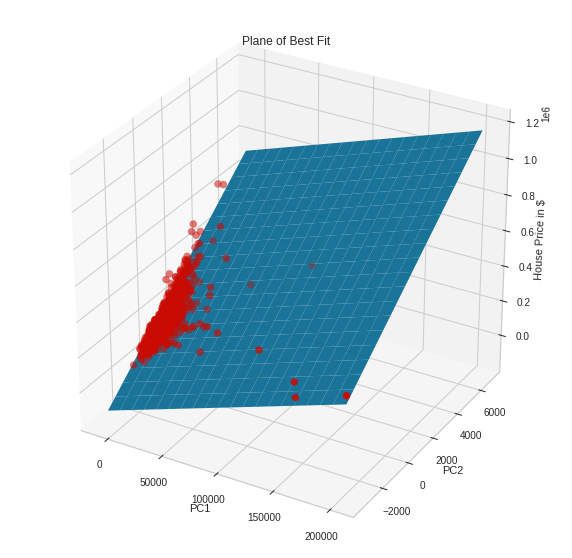

In [266]:
fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X_plot, Y_plot, Z_plot, rstride=1, cstride=1, alpha=0.9)
ax.scatter(final_data_array[:,0], final_data_array[:,1], final_data_array[:,2], c='r', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('House Price in $')
ax.set_title("Plane of Best Fit")